In [3]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
dataset = pd.read_csv('covid_19_data.csv',  parse_dates=True)
# Parse string to datetime type
dataset['ObservationDate'] = pd.to_datetime(dataset['ObservationDate'], infer_datetime_format=True) 
# indexedDataset = dataset.set_index(['ObservationDate'])

In [3]:
indexedDataset.head()

,SNo,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
ObservationDate,,,,,,,
2020-01-22,1,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2020-01-22,2,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2020-01-22,3,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
2020-01-22,4,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2020-01-22,5,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [4]:
indexedDataset.drop(columns='SNo', axis=1, inplace=True)

In [5]:
indexedDataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22189 entries, 2020-01-22 to 2020-05-06
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  10726 non-null  object 
 1   Country/Region  22189 non-null  object 
 2   Last Update     22189 non-null  object 
 3   Confirmed       22189 non-null  float64
 4   Deaths          22189 non-null  float64
 5   Recovered       22189 non-null  float64
dtypes: float64(3), object(3)
memory usage: 1.2+ MB


In [5]:
datewise_df = dataset.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

In [6]:
datewise_df.head()

,Confirmed,Recovered,Deaths
ObservationDate,,,
2020-01-22,555.0,28.0,17.0
2020-01-23,653.0,30.0,18.0
2020-01-24,941.0,36.0,26.0
2020-01-25,1438.0,39.0,42.0
2020-01-26,2118.0,52.0,56.0


In [7]:
nic = len(dataset["Country/Region"].unique())
cfm_cases = datewise_df["Confirmed"].iloc[-1]
rec = datewise_df["Recovered"].iloc[-1]
deaths = datewise_df["Deaths"].iloc[-1]
active_cases = cfm_cases - rec- deaths
closed_cases = rec + deaths

In [8]:
def overview():
    print('=== COVID-19 Global Overview ===')
    print(f'== Number of countries which infected:{nic} ==')
    print(f'== Total num of confirmed cases:{cfm_cases} ==')
    print(f'== Total num of recovered cases:{rec} ==')
    print(f'== Total num of deaths:{deaths}')
    print(f'== Total num of Active cases around the world:{active_cases} ==')
    print(f'== Total num of Closed cases around the world:{closed_cases} ==')

In [9]:
overview()

=== COVID-19 Global Overview ===
== Number of countries which infected:222 ==
== Total num of confirmed cases:3755341.0 ==
== Total num of recovered cases:1245413.0 ==
== Total num of deaths:263831.0
== Total num of Active cases around the world:2246097.0 ==
== Total num of Closed cases around the world:1509244.0 ==


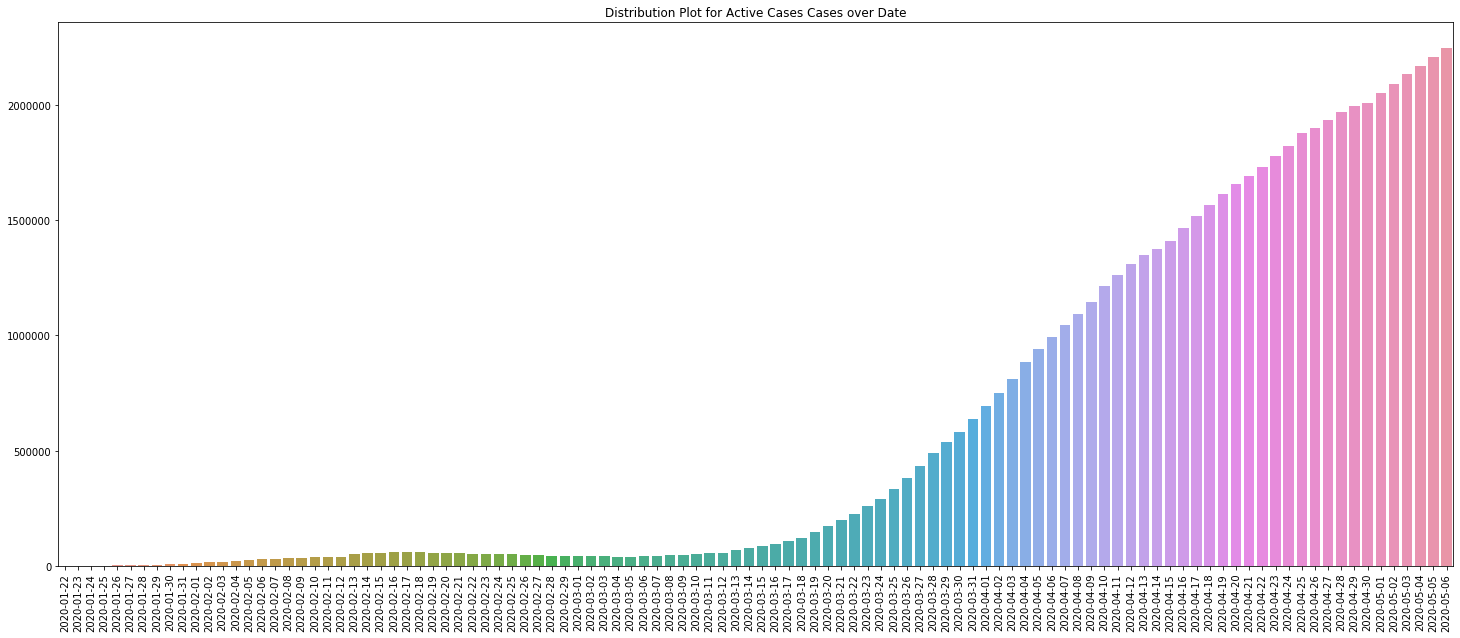

In [10]:
# Plotting the distribution on active cases
plt.figure(figsize=(25,10))
sns.barplot(x=datewise_df.index.date, y = datewise_df["Confirmed"]-datewise_df["Recovered"]-datewise_df["Deaths"])
plt.title("Distribution Plot for Active Cases Cases over Date")
plt.xticks(rotation=90);

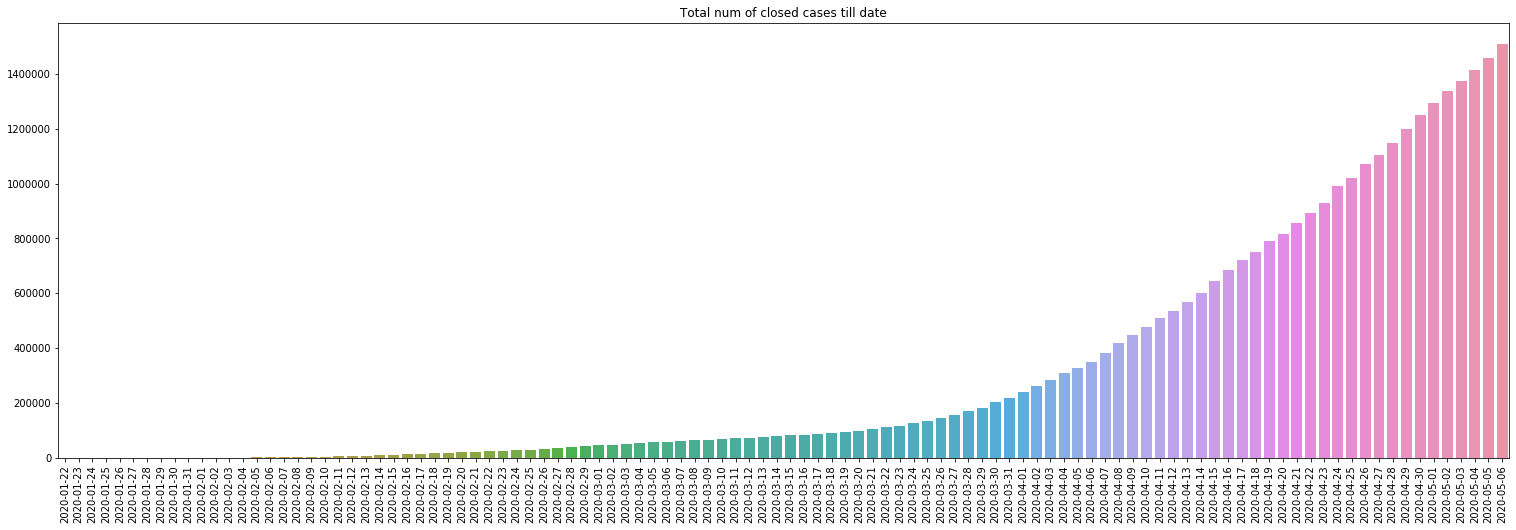

In [11]:
# Plotting distribution of closed cases
plt.figure(figsize=(26,8))
sns.barplot(x=datewise_df.index.date, y = datewise_df["Recovered"]+ datewise_df["Deaths"])
plt.xticks(rotation=90)
plt.title("Total num of closed cases till date");

In [16]:
x = datewise_df.index.weekofyear

In [17]:
x

Int64Index([ 4,  4,  4,  4,  4,  5,  5,  5,  5,  5,
            ...
            18, 18, 18, 18, 18, 18, 18, 19, 19, 19],
           dtype='int64', name='ObservationDate', length=106)

In [19]:
datewise_df.shape, x.shape

((106, 4), (106,))

In [18]:
datewise_df["WeekOfYear"]=datewise_df.index.weekofyear

In [13]:
datewise_df.head()

,Confirmed,Recovered,Deaths,WeekOfYear
ObservationDate,,,,
2020-01-22,555.0,28.0,17.0,4
2020-01-23,653.0,30.0,18.0,4
2020-01-24,941.0,36.0,26.0,4
2020-01-25,1438.0,39.0,42.0,4
2020-01-26,2118.0,52.0,56.0,4


In [50]:
datewise_df.head()

,Confirmed,Recovered,Deaths,WeekOfYear
ObservationDate,,,,
2020-01-22,555.0,28.0,17.0,4
2020-01-23,653.0,30.0,18.0,4
2020-01-24,941.0,36.0,26.0,4
2020-01-25,1438.0,39.0,42.0,4
2020-01-26,2118.0,52.0,56.0,4


In [52]:
list(datewise_df['WeekOfYear'].unique())

[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [54]:
week_num=[]
weekwise_confirmed=[]
weekwise_recovered=[]
weekwise_deaths=[]
counter=1
for i in list(datewise_df["WeekOfYear"].unique()):
    weekwise_confirmed.append(datewise_df[datewise_df["WeekOfYear"]==i]["Confirmed"].iloc[-1])
    weekwise_recovered.append(datewise_df[datewise_df["WeekOfYear"]==i]["Recovered"].iloc[-1])
    weekwise_deaths.append(datewise_df[datewise_df["WeekOfYear"]==i]["Deaths"].iloc[-1])
    week_num.append(counter)
    counter=counter+1

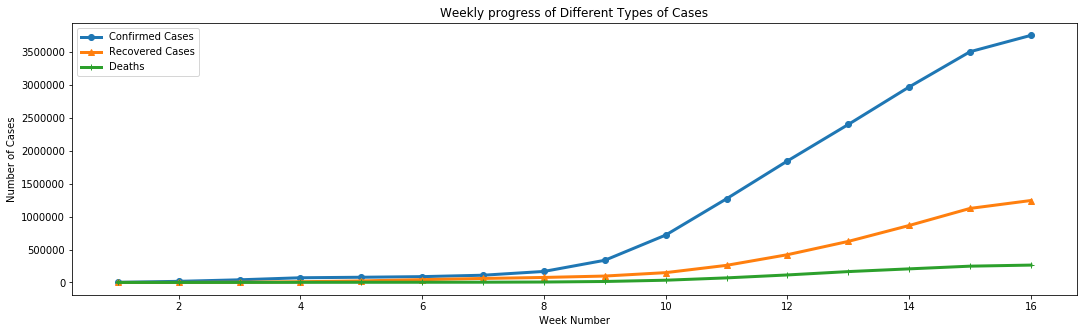

In [57]:
plt.figure(figsize=(18,5))
plt.plot(week_num,weekwise_confirmed,linewidth=3,marker="o", label='Confirmed Cases')
plt.plot(week_num,weekwise_recovered,linewidth=3,marker="^", label='Recovered Cases')
plt.plot(week_num,weekwise_deaths,linewidth=3,marker="+", label='Deaths')
plt.ylabel("Number of Cases")
plt.xlabel("Week Number")
plt.title("Weekly progress of Different Types of Cases")
plt.legend();

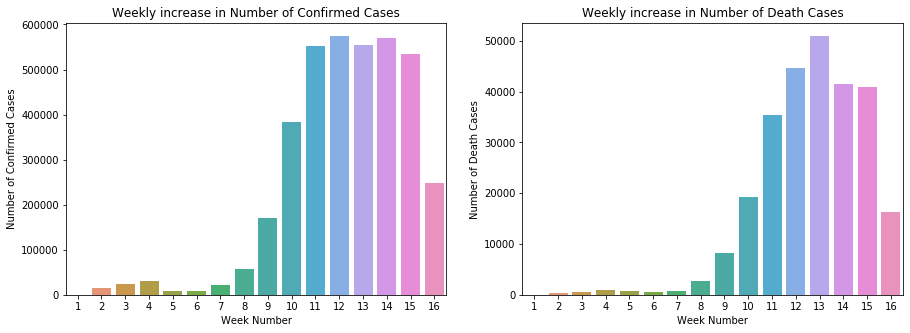

In [59]:
fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(15,5))
sns.barplot(x=week_num,y=pd.Series(weekwise_confirmed).diff().fillna(0),ax=ax1)
sns.barplot(x=week_num,y=pd.Series(weekwise_deaths).diff().fillna(0),ax=ax2)
ax1.set_xlabel("Week Number")
ax2.set_xlabel("Week Number")
ax1.set_ylabel("Number of Confirmed Cases")
ax2.set_ylabel("Number of Death Cases")
ax1.set_title("Weekly increase in Number of Confirmed Cases")
ax2.set_title("Weekly increase in Number of Death Cases");

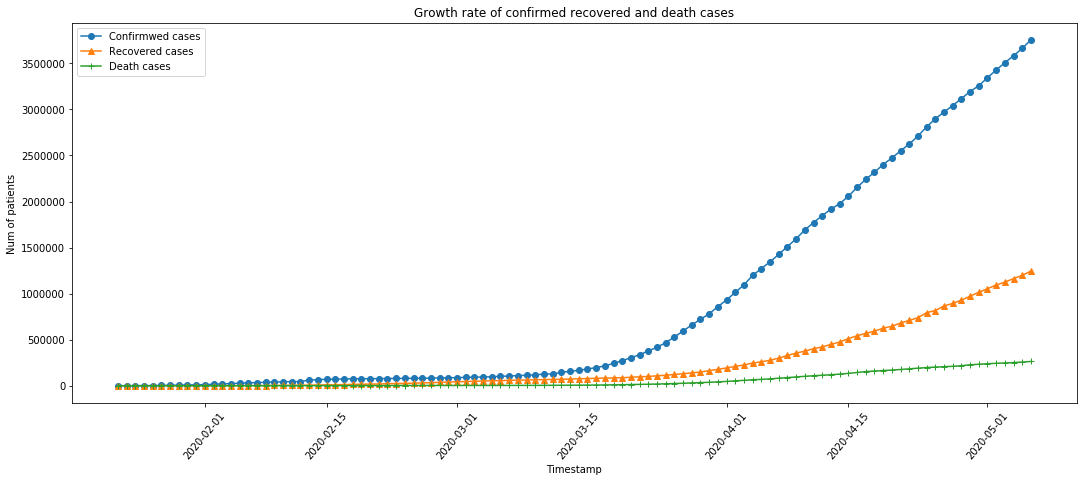

In [61]:
plt.figure(figsize=(18,7))
plt.plot(datewise_df["Confirmed"],marker="o",label="Confirmwed cases")
plt.plot(datewise_df["Recovered"],marker="^",label="Recovered cases")
plt.plot(datewise_df["Deaths"],marker="+",label="Death cases")
plt.xticks(rotation="50")
plt.ylabel("Num of patients")
plt.xlabel("Timestamp")
plt.title("Growth rate of confirmed recovered and death cases")
plt.legend();

In [62]:

#Calculating the Mortality Rate and Recovery Rate
datewise_df["Mortality Rate"] = (datewise_df["Deaths"]/datewise_df["Confirmed"])*100 
datewise_df["Recovery Rate"] = (datewise_df["Recovered"]/datewise_df["Confirmed"])*100 
datewise_df["Active Cases"] = (datewise_df["Confirmed"]-datewise_df["Recovered"]-datewise_df["Deaths"]) 
datewise_df["Closed Cases"] = (datewise_df["Deaths"]+datewise_df["Recovered"])


In [63]:
datewise_df.head()

,Confirmed,Recovered,Deaths,WeekOfYear,Mortality Rate,Recovery Rate,Active Cases,Closed Cases
ObservationDate,,,,,,,,
2020-01-22,555.0,28.0,17.0,4,3.063063,5.045045,510.0,45.0
2020-01-23,653.0,30.0,18.0,4,2.756508,4.594181,605.0,48.0
2020-01-24,941.0,36.0,26.0,4,2.763018,3.825717,879.0,62.0
2020-01-25,1438.0,39.0,42.0,4,2.920723,2.712100,1357.0,81.0
2020-01-26,2118.0,52.0,56.0,4,2.644004,2.455146,2010.0,108.0


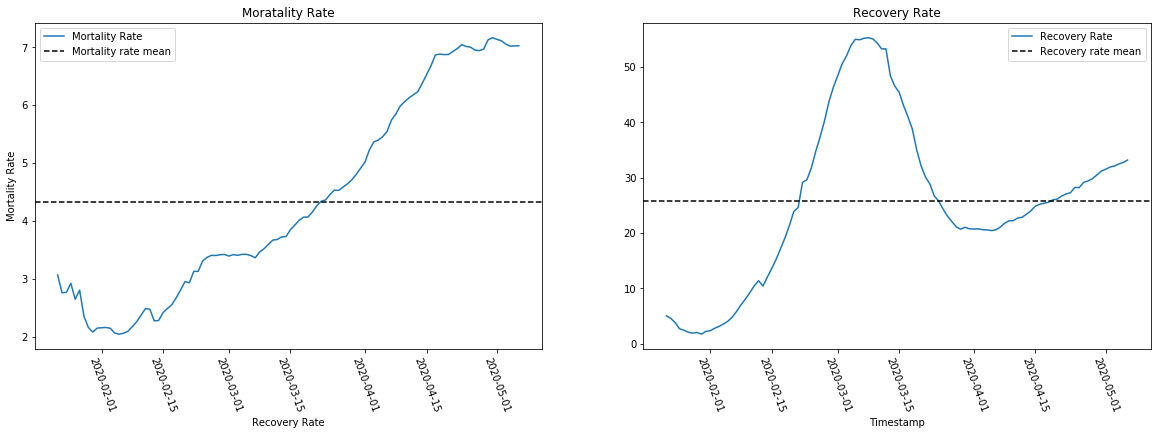

In [67]:
# ploting mortality and Recovery rate
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,6))
ax1.plot(datewise_df["Mortality Rate"],label="Mortality Rate")
ax2.plot(datewise_df["Recovery Rate"],label="Recovery Rate")
ax1.set_title("Moratality Rate")
ax2.set_title("Recovery Rate")
ax1.set_xlabel("Timestamp")
ax2.set_xlabel("Timestamp")
ax1.set_ylabel("Mortality Rate")
ax1.set_xlabel("Recovery Rate")
for tick in ax1.get_xticklabels():
    tick.set_rotation(-70)
for tick in ax2.get_xticklabels():
    tick.set_rotation(-70)
ax1.axhline(datewise_df["Mortality Rate"].mean(),label="Mortality rate mean", linestyle="--", color='black')
ax2.axhline(datewise_df["Recovery Rate"].mean(),label="Recovery rate mean", linestyle="--", color='black')
ax2.legend()
ax1.legend();

In [84]:
def moratality_recovery_overview():
    print("Average mortality rate mean", datewise_df["Mortality Rate"].mean())
    print("Average mortality rate median", datewise_df["Mortality Rate"].median())
    print("Average recovery rate mean", datewise_df["Recovery Rate"].mean())
    print("Average recovery rate median", datewise_df["Recovery Rate"].median())
    print("Average Increase in number of confirmed cases every day :",np.round(datewise_df["Confirmed"].diff().fillna(0).mean()))
    print("Average Increase in number of recovered cases every day :",np.round(datewise_df["Recovered"].diff().fillna(0).mean()))
    print("Average Increase in number of death cases every day :",np.round(datewise_df["Deaths"].diff().fillna(0).mean()))

In [85]:
moratality_recovery_overview()

Average mortality rate mean 4.331547735634356
Average mortality rate median 3.786877785090073
Average recovery rate mean 25.70457805514983
Average recovery rate median 25.018809604576266
Average Increase in number of confirmed cases every day : 35423.0
Average Increase in number of recovered cases every day : 11749.0
Average Increase in number of death cases every day : 2489.0


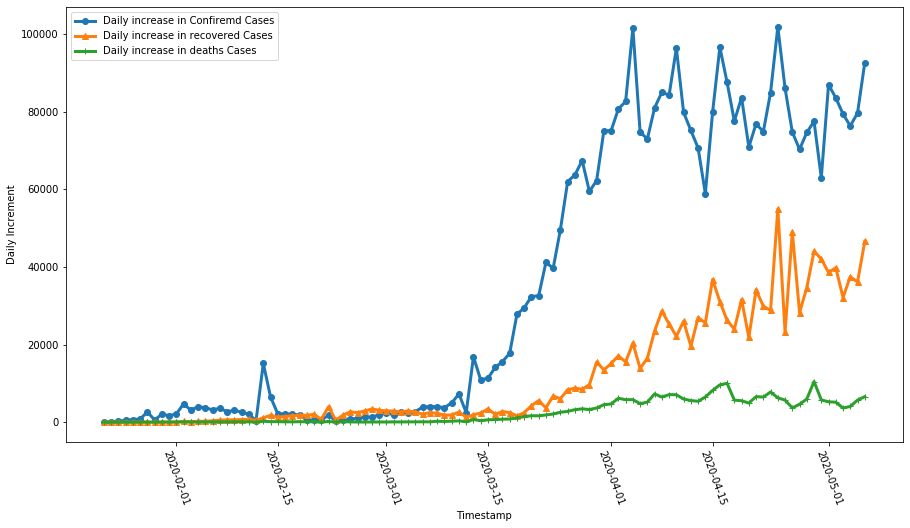

In [88]:
plt.figure(figsize=(15,8))
plt.plot(datewise_df["Confirmed"].diff().fillna(0),label="Daily increase in Confiremd Cases",linewidth=3,marker="o")
plt.plot(datewise_df["Recovered"].diff().fillna(0),label="Daily increase in recovered Cases",linewidth=3,marker="^")
plt.plot(datewise_df["Deaths"].diff().fillna(0),label="Daily increase in deaths Cases",linewidth=3,marker="+")
plt.legend()
plt.xticks(rotation=-70)
plt.ylabel("Daily Increment")
plt.xlabel("Timestamp");

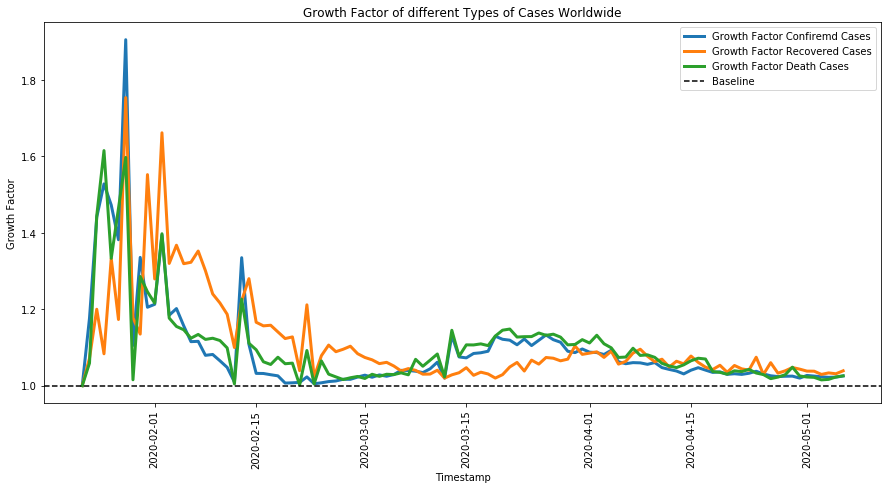

In [92]:
daily_increase_confirm=[]
daily_increase_recovered=[]
daily_increase_deaths=[]
for i in range(datewise_df.shape[0]-1):
    daily_increase_confirm.append(((datewise_df["Confirmed"].iloc[i+1]/datewise_df["Confirmed"].iloc[i])))
    daily_increase_recovered.append(((datewise_df["Recovered"].iloc[i+1]/datewise_df["Recovered"].iloc[i])))
    daily_increase_deaths.append(((datewise_df["Deaths"].iloc[i+1]/datewise_df["Deaths"].iloc[i])))
daily_increase_confirm.insert(0,1)
daily_increase_recovered.insert(0,1)
daily_increase_deaths.insert(0,1)

plt.figure(figsize=(15,7))
plt.plot(datewise_df.index,daily_increase_confirm,label="Growth Factor Confiremd Cases",linewidth=3)
plt.plot(datewise_df.index,daily_increase_recovered,label="Growth Factor Recovered Cases",linewidth=3)
plt.plot(datewise_df.index,daily_increase_deaths,label="Growth Factor Death Cases",linewidth=3)
plt.xlabel("Timestamp")
plt.ylabel("Growth Factor")
plt.title("Growth Factor of different Types of Cases Worldwide")
plt.axhline(1,linestyle='--',color='black',label="Baseline")
plt.xticks(rotation=90)
plt.legend();